# Graph Theory
This notebook will construct a graph of the manager-employee relationships within a company using the [HR Dataset](https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/reinforcement%20learning/2%20-%20graph%20theory/HRDatasetGraphTheory.csv). This dataset contains similar features to the one used in the remainder of the repository, but additionally contains names of employees and their managers which are useful for graphing. 

In [152]:
# Import the necessary python packages
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pyvis.network import Network

#importing the dataset as a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/reinforcement%20learning/2%20-%20graph%20theory/HRDatasetGraphTheory.csv")

In [153]:
shape = df. shape
print(shape)
df.head()

(311, 37)


,Employee_info,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Wilson K Adinolfi, Production Technician I",Wilson K Adinolfi,10026,0,0,1,1,5,4,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Karthikeyan Ait Sidi, Sr. DBA",Karthikeyan Ait Sidi,10084,1,1,1,5,3,3,0,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Sarah Akinkuolie, Production Technician II",Sarah Akinkuolie,10196,1,1,0,5,5,3,0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Trina Alagbe, Production Technician I",Trina Alagbe,10088,1,1,0,1,5,3,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Carol Anderson, Production Technician I",Carol Anderson,10069,0,2,0,5,5,3,0,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [154]:
#Instantiate the graph
G = nx.Graph()

In [165]:
nodes_list = df['Employee_info']
edges_raw = df[['Employee_info', 'ManagerName', 'EmpSatisfaction']]

for i in nodes_list:
    G.add_node(i)
    
for i in range(len(edges_raw)):
    emp_name = edges_raw['Employee_info'][i]
    mana_name = edges_raw['ManagerName'][i]
    G.add_edge(emp_name,mana_name)

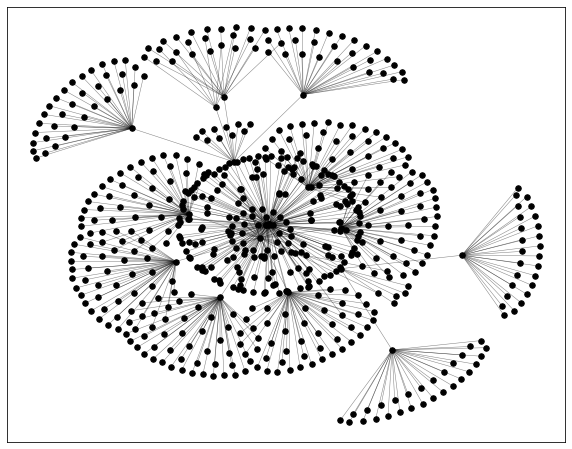

In [166]:
# Set your figure size
plt.figure(figsize=(10, 8))

# Set your pos
pos = nx.kamada_kawai_layout(G)

# Set your node options
node_options = {"node_color": "black", "node_size": 30}

# Set your edge options
edge_options = {"width": .50, "alpha": .5, "edge_color": "black"}

# Set your node label options
node_label_options = {"font_size": 5,
                      "font_color": "blue",
                      "verticalalignment": "bottom",
                      "horizontalalignment": "left"}

# Draw nodes
nx.draw_networkx_nodes(G, pos, **node_options)

# Draw edges
nx.draw_networkx_edges(G, pos, **edge_options)

plt.show()

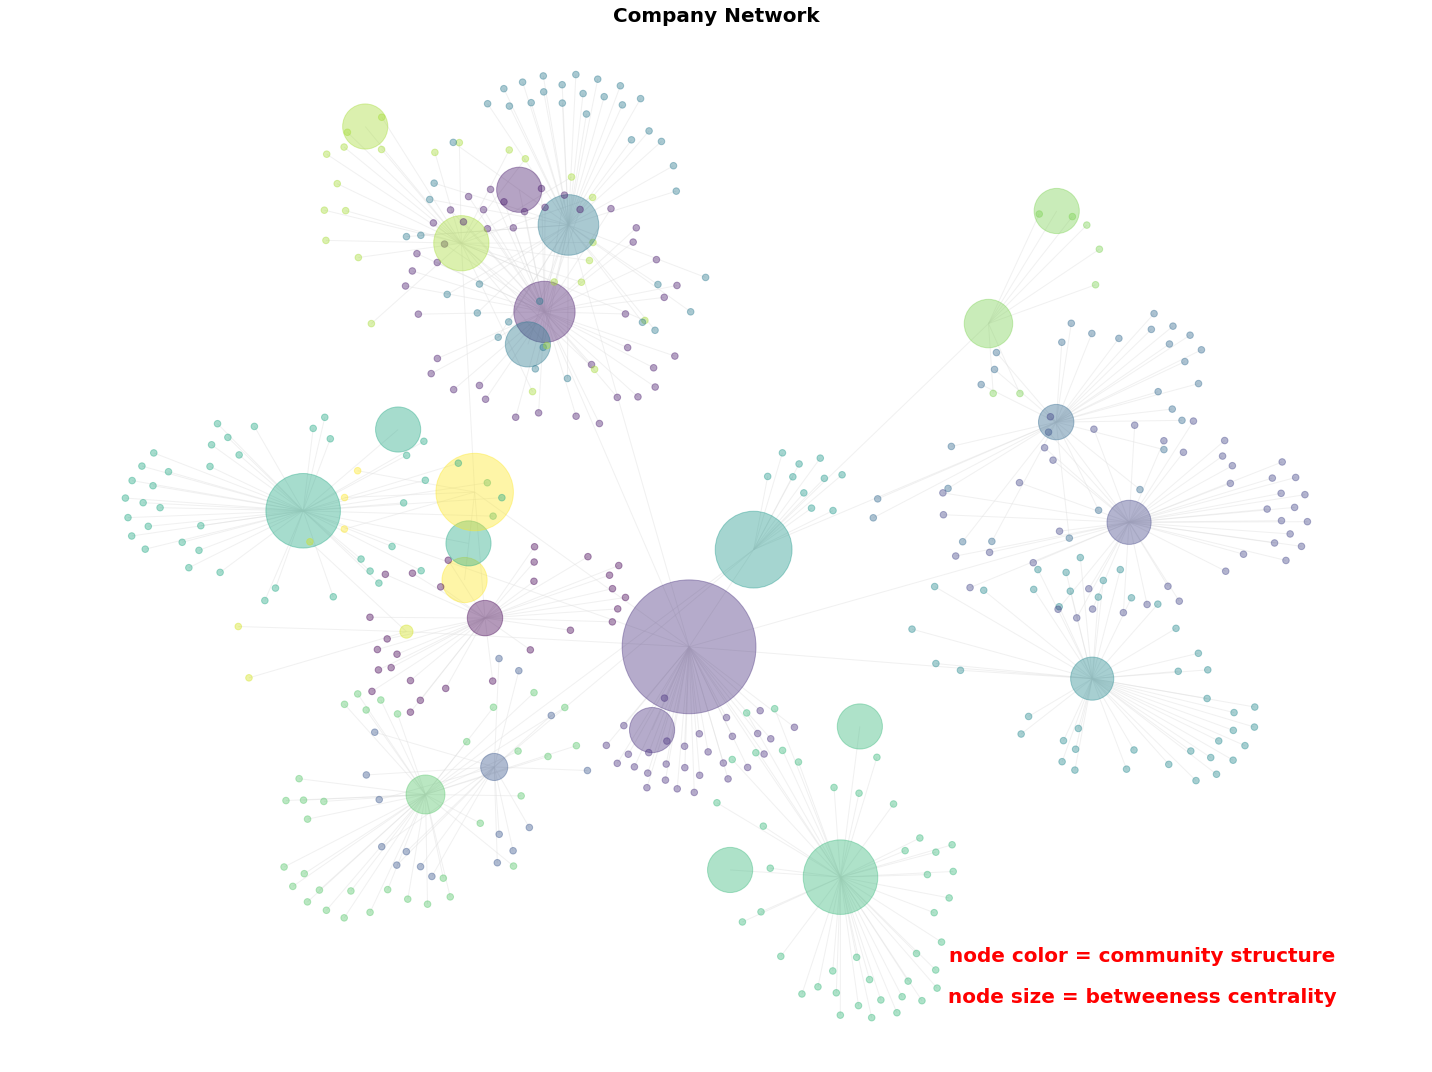

In [167]:
# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Company Network", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [176]:
net = Network()
nodes_list = df['Employee_Name']
for i in nodes_list:
    net.add_node(i)

missing_managers = []
for i in df['ManagerName']:
    if i not in df['Employee_Name']:
        net.add_node(i)        

for i in range(len(edges_raw)):
    emp_name = nodes_list[i]
    mana_name = edges_raw['ManagerName'][i]
    net.add_edge(emp_name,mana_name)

net.show('nodes.html')


In [173]:
net = Network()

for i in nodes_list:
    net.add_node(i)

missing_managers = []
for i in df['ManagerName']:
    if i not in df['Employee_Name']:
        net.add_node(i)        

for i in range(len(edges_raw)):
    emp_name = edges_raw['Employee_info'][i]
    mana_name = edges_raw['ManagerName'][i]
    net.add_edge(emp_name,mana_name)

net.show('nodes.html')

In [119]:
for v in G.nodes:
    print(f" Neighbors of {v} = {list(nx.neighbors(G, v))} \n")

 Neighbors of Wilson K Adinolfi = ['Michael Albert'] 

 Neighbors of Karthikeyan Ait Sidi = ['Simon Roup'] 

 Neighbors of Sarah Akinkuolie = ['Kissy Sullivan'] 

 Neighbors of Trina Alagbe = ['Elijiah Gray'] 

 Neighbors of Carol Anderson = ['Webster Butler'] 

 Neighbors of Linda Anderson = ['Amy Dunn'] 

 Neighbors of Colby Andreola = ['Alex Sweetwater'] 

 Neighbors of Sam Athwal = ['Ketsia Liebig'] 

 Neighbors of Linda Bachiochi = ['Brannon Miller'] 

 Neighbors of Alejandro Bacong = ['Peter Monroe'] 

 Neighbors of Rachael Baczenski = ['David Stanley'] 

 Neighbors of Thomas Barbara = ['Kissy Sullivan'] 

 Neighbors of Hector Barbossa = ['Simon Roup'] 

 Neighbors of Francesco A Barone = ['Kelley Spirea'] 

 Neighbors of Nader Barton = ['Michael Albert'] 

 Neighbors of Norman Bates = ['Kelley Spirea'] 

 Neighbors of Kimberly Beak = ['Kelley Spirea'] 

 Neighbors of Courtney Beatrice = ['Elijiah Gray'] 

 Neighbors of Renee Becker = ['Simon Roup'] 

 Neighbors of Scott Becker =